<a href="https://colab.research.google.com/github/DanielMora97/Proyecto-de-grado/blob/main/EQ/Simulacion_ecualizador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Calculos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatter
from sympy import symbols, Eq, solve, simplify
# Habilitar renderizado de LaTeX en las gráficas
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'

## LF EQ

##LF peak EQ

In [2]:
# Definimos los parámetros
f = np.linspace(1, 30000, 44100)  # Frecuencia en Hz
w = 2 * np.pi * f                 # Frecuencia angular en rad/s
R1 = 20000                        # Resistencia en ohmios
R2 = 20000                        # Resistencia en ohmios
R3 = 120000                       # Resistencia en ohmios
R4 = 120000                       # Resistencia en ohmios
C1 = 100e-9                       # Capacitancia C1 en Faradios
C2 = 43e-9                        # Capacitancia C2 en Faradios
C3 = 10e-9                       # Capacitancia C3 en Faradios
Rin = 10000                       # Resistencia de entrada inversora
Rfeed = 10000                     # Resistencia de realimentación inversora
fc1 = 1 / (2 * np.pi * np.sqrt(R1 * R2 * C1 * C2))  # Frecuencia central 1
fc2 = 1 / (2 * np.pi * np.sqrt(R3 * R4 * C1 * C2))  # Frecuencia central 2
# Calculamos las reactancias capacitivas
Xc1 = 1 / (w * C1)
Xc2 = 1 / (w * C2)
Xc3 = 1 / (2 * np.pi * fc1 * C1)
Xc4 = 1 / (2 * np.pi * fc1 * C2)

# Calculamos las impedancias del pasabanda de Wien para fc1
Z1 = R1 + (-1j * Xc1)  # Impedancia Z1 en serie
Z2 = 1 / ((1 / R2) + (1 / (-1j * Xc2)))  # Impedancia Z2 en paralelo
Z1abs = np.abs(R1 + (-1j * Xc3)) # Magnitud de Z1 en serie
Z2abs = np.abs(1 / ((1 / R2) + (1 / (-1j * Xc4))))  # Magnitud de Z2 en paralelo

# Calculamos las impedancias del pasabanda de Wien para fc2
Z3 = R3 + (-1j * Xc1)  # Impedancia Z1 en serie
Z4 = 1 / ((1 / R4) + (1 / (-1j * Xc2)))  # Impedancia Z2 en paralelo
Z1abs = np.abs(R3 + (-1j * Xc3)) # Magnitud de Z1 en serie
Z2abs = np.abs(1 / ((1 / R4) + (1 / (-1j * Xc4))))  # Magnitud de Z2 en paralelo


# Calculamos ganancia del EQ por medio del OP amp restador teniendo en cuenta la posicion del potenciometro
A1 = (R1 * Z2 - R2 * Z1) / (R1 * (Z1 + Z2))
G1 = 20 * np.log10(np.abs(A1))
A2 = -(R2 * (Z1 + Z2)) / (R1 * Z1 - R2 * Z2)
G2 = 20 * np.log10(np.abs(A2))

A3 = (R3 * Z4 - R4 * Z3) / (R3 * (Z3 + Z4))
G3 = 20 * np.log10(np.abs(A3))
A4 = -(R3 * (Z3 + Z4)) / (R3 * Z3 - R4 * Z4)
G4 = 20 * np.log10(np.abs(A4))

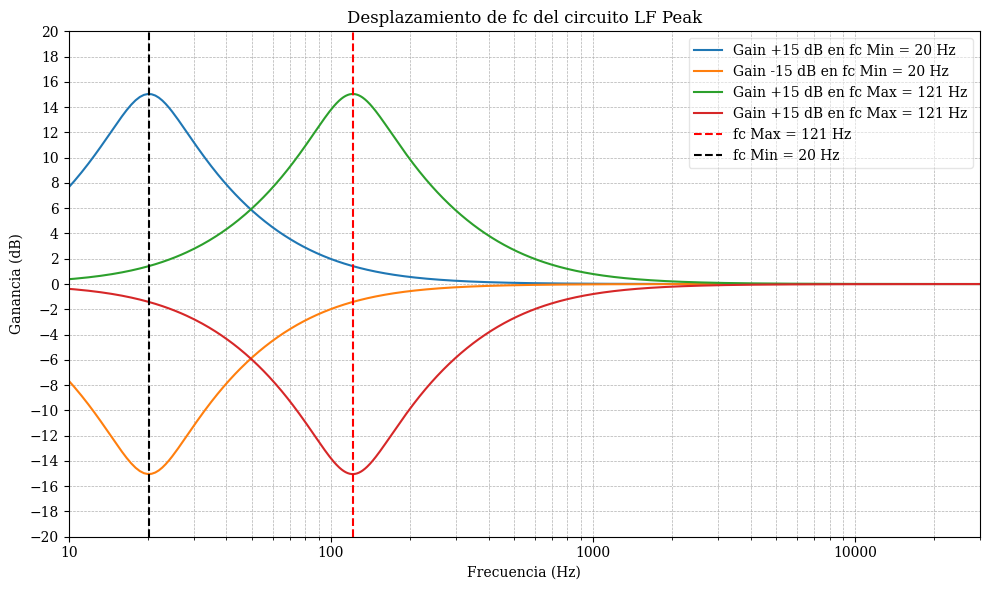

In [3]:
# Graficamos la ganancia en función de la frecuencia
plt.figure(figsize=(10, 6))
plt.semilogx(f, G4, label=f'Gain +15 dB en fc Min = {fc2:.0f} Hz')
plt.semilogx(f, G3, label=f'Gain -15 dB en fc Min = {fc2:.0f} Hz')
plt.semilogx(f, G2, label=f'Gain +15 dB en fc Max = {fc1:.0f} Hz')
plt.semilogx(f, G1, label=f'Gain +15 dB en fc Max = {fc1:.0f} Hz')


plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.xlim([10, 30000])  # Limitar el eje x entre 10 Hz y 20 kHz
plt.ylim([-20, 20])
plt.yticks(np.arange(-20, 21, 2))  # Mostrar ticks en el eje y de 2 en 2 dB
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Personalizar el formato del eje x
ax = plt.gca()
ax.xaxis.set_major_formatter(LogFormatter(base=10, labelOnlyBase=False))  # Muestra números normales en log


# Añadir la línea vertical en fc
plt.axvline(fc1, color='red', linestyle='--', label=f'fc Max = {fc1:.0f} Hz')
plt.axvline(fc2, color='black', linestyle='--', label=f'fc Min = {fc2:.0f} Hz')
plt.legend(loc='upper right', framealpha=0.5)
#plt.legend()
plt.title('Desplazamiento de fc del circuito LF Peak')
# Ajuste automático para evitar solapamiento de elementos
plt.tight_layout()
plt.show()

###Ganancia y Q

In [4]:
# Frecuencias centrales
fc1 = 1 / (2 * np.pi * np.sqrt(R1 * R2 * C1 * C2))
fc2 = 1 / (2 * np.pi * np.sqrt(R3 * R4 * C1 * C2))

# Reactancias y Ganancias en fc1
Xc1_fc1 = 1 / (2 * np.pi * fc1 * C1)
Xc2_fc1 = 1 / (2 * np.pi * fc1 * C2)
Z1_fc1 = R1 + (-1j * Xc1_fc1)
Z2_fc1 = 1 / ((1 / R2) + (1 / (-1j * Xc2_fc1)))
Amin_fc1 = (R1 * Z2_fc1 - R2 * Z1_fc1) / (R1 * (Z1_fc1 + Z2_fc1))
Amax_fc1 = -(R2 * (Z1_fc1 + Z2_fc1)) / (R1 * Z1_fc1 - R2 * Z2_fc1)
Gmin_fc1 = 20 * np.log10(np.abs(Amin_fc1))
Gmax_fc1 = 20 * np.log10(np.abs(Amax_fc1))

# Reactancias y Ganancias en fc2
Xc1_fc2 = 1 / (2 * np.pi * fc2 * C1)
Xc2_fc2 = 1 / (2 * np.pi * fc2 * C2)
Z3_fc2 = R3 + (-1j * Xc1_fc2)
Z4_fc2 = 1 / ((1 / R4) + (1 / (-1j * Xc2_fc2)))
Amin_fc2 = (R3 * Z4_fc2 - R4 * Z3_fc2) / (R3 * (Z3_fc2 + Z4_fc2))
Amax_fc2 = -(R4 * (Z3_fc2 + Z4_fc2)) / (R3 * Z3_fc2 - R4 * Z4_fc2)
Gmin_fc2 = 20 * np.log10(np.abs(Amin_fc2))
Gmax_fc2 = 20 * np.log10(np.abs(Amax_fc2))

# Factor de calidad Q para cada caso usando tu ecuación
Q1 = 0.5 * np.sqrt(((R3 + R2) / (R3 + R1)) * (C1 / C2))
Q2 = 0.5 * np.sqrt(((R4 + R2) / (R4 + R1)) * (C1 / C2))

# Resultados
print(f"fc1 = {fc1:.2f} Hz -> Gmin = {Gmin_fc1:.2f} dB, Gmax = {Gmax_fc1:.2f} dB")
print(f"fc2 = {fc2:.2f} Hz -> Gmin = {Gmin_fc2:.2f} dB, Gmax = {Gmax_fc2:.2f} dB")
print(f"Q para fc1 ({fc1:.2f} Hz): {Q1:.4f}")
print(f"Q para fc2 ({fc2:.2f} Hz): {Q2:.4f}")

fc1 = 121.35 Hz -> Gmin = -15.04 dB, Gmax = 15.04 dB
fc2 = 20.23 Hz -> Gmin = -15.04 dB, Gmax = 15.04 dB
Q para fc1 (121.35 Hz): 0.7625
Q para fc2 (20.23 Hz): 0.7625


##LF Shelving

In [5]:
# Definimos los parámetros
f = np.linspace(1, 30000, 44100)  # Frecuencia en Hz
w = 2 * np.pi * f                # Frecuencia angular en rad/s
Rdiv1 = 6800                       # Resistencia en ohmios
Rdiv2 = 4700                       # Resistencia en ohmios
R1 = 22200                       # Resistencia en ohmios
R2 = 122200                       # Resistencia en ohmios
C = 10e-9                       # Capacitancia C1 en Faradios
Rin = 10000                      # Resistencia de entrada inversora
Rfeed = 10000                    # Resistencia de realimentación inversora
fc1 = 1 / (2 * np.pi * R1 * C)  # Frecuencia central 1
fc2 = 1 / (2 * np.pi * R2 * C)  # Frecuencia central 2

# Calculamos la reactancia capacitiva
Xc1 = 1 / (w * C)

# Calculamos la impedancia capacitiva
Z1 = -1j * Xc1

# Calculamos el divisor de voltaje
Adiv = Rdiv2 / (Rdiv1 + Rdiv2)

# Calculamos la ecuacion de ganancia del LPF
Alp = Z1 / (Z1 + R1)

#Ganancia del LPF con atenuador
At = Adiv * Alp
G = 20 * np.log10(np.abs(At))

# Calculamos ganancia del EQ por medio del OP amp restador teniendo en cuenta la posicion del potenciometro
Av1 = -(Rfeed*(Rdiv1 + Rdiv2)*(R1 + Z1))/(R1*Rdiv1*Rin + R1*Rdiv2*Rin - Rdiv2*Rfeed*Z1 + Rdiv1*Rin*Z1)
G1 = 20 * np.log10(np.abs(Av1))
Av2 = -(Rfeed*(Rdiv1 + Rdiv2)*(R2 + Z1))/(R2*Rdiv1*Rin + R2*Rdiv2*Rin - Rdiv2*Rfeed*Z1 + Rdiv1*Rin*Z1)
G2 = 20 * np.log10(np.abs(Av2))
Av3 = -(R1*Rdiv1*Rfeed + R1*Rdiv2*Rfeed + Rdiv1*Rfeed*Z1 - Rdiv2*Rin*Z1)/(Rin*(Rdiv1 + Rdiv2)*(R1 + Z1))
G3 = 20 * np.log10(np.abs(Av3))
Av4 = -(R2*Rdiv1*Rfeed + R2*Rdiv2*Rfeed + Rdiv1*Rfeed*Z1 - Rdiv2*Rin*Z1)/(Rin*(Rdiv1 + Rdiv2)*(R2 + Z1))
G4 = 20 * np.log10(np.abs(Av4))

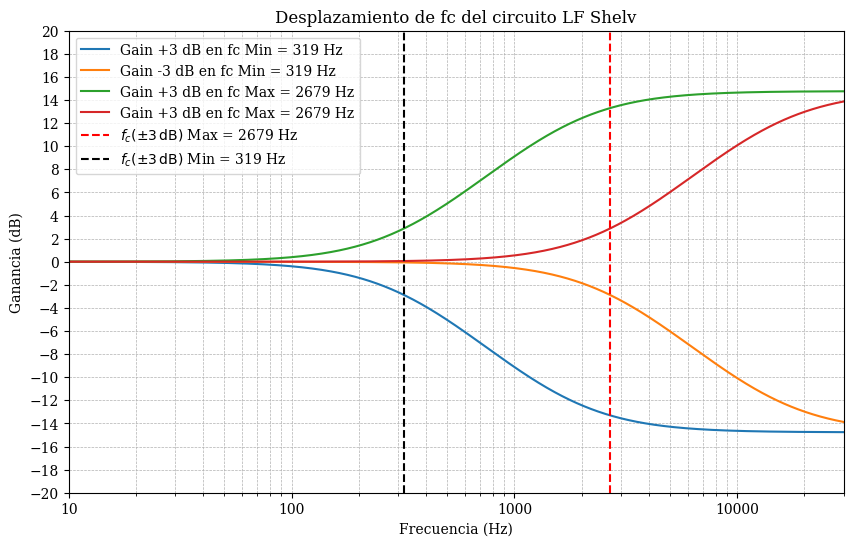

In [31]:
plt.figure(figsize=(10, 6))
plt.semilogx(f, G4, label=f'Gain +3 dB en fc Min = {fc2:.0f} Hz')
plt.semilogx(f, G3, label=f'Gain -3 dB en fc Min = {fc2:.0f} Hz')
plt.semilogx(f, G2, label=f'Gain +3 dB en fc Max = {fc1:.0f} Hz')
plt.semilogx(f, G1, label=f'Gain +3 dB en fc Max = {fc1:.0f} Hz')

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.xlim([10, 30000])  # Limitar el eje x entre 10 Hz y 20 kHz
plt.ylim([-20, 20])
plt.yticks(np.arange(-20, 21, 2))  # Mostrar ticks en el eje y de 2 en 2 dB
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Personalizar el formato del eje x
ax = plt.gca()
ax.xaxis.set_major_formatter(LogFormatter(base=10, labelOnlyBase=False))  # Muestra números normales en log


# Añadir la línea vertical en fc
plt.axvline(fc1, color='red', linestyle='--',
            label=fr'$f_c (\pm 3 \, \mathrm{{dB}})$ Max = {fc1:.0f} Hz')

plt.axvline(fc2, color='black', linestyle='--',
            label=fr'$f_c (\pm 3 \, \mathrm{{dB}})$ Min = {fc2:.0f} Hz')

plt.legend()
plt.title('Desplazamiento de fc del circuito LF Shelv')
plt.show()

###Ganancia

In [7]:
import numpy as np

# Definimos los parámetros
f = np.linspace(1, 30000, 44100)       # Frecuencia en Hz
w = 2 * np.pi * f                      # Frecuencia angular en rad/s

Rdiv1 = 6800                           # Resistencia en ohmios
Rdiv2 = 4700                           # Resistencia en ohmios
R1 = 22200
R2 = 122200
C = 10e-9                              # Capacitancia en Faradios
Rin = 10000
Rfeed = 10000

# Frecuencias centrales
fc1 = 1 / (2 * np.pi * R1 * C)
fc2 = 1 / (2 * np.pi * R2 * C)

# Reactancia capacitiva
Xc1 = 1 / (w * C)
Z1 = -1j * Xc1

# Divisor de voltaje
Adiv = Rdiv2 / (Rdiv1 + Rdiv2)

# Filtro LPF con atenuador
Alp = Z1 / (Z1 + R1)
At = Adiv * Alp
G = 20 * np.log10(np.abs(At))

# Vectorizados: Ganancias con el operacional restador
Av1 = -(Rfeed * (Rdiv1 + Rdiv2) * (R1 + Z1)) / (R1 * Rdiv1 * Rin + R1 * Rdiv2 * Rin - Rdiv2 * Rfeed * Z1 + Rdiv1 * Rin * Z1)
G1 = 20 * np.log10(np.abs(Av1))

Av2 = -(Rfeed * (Rdiv1 + Rdiv2) * (R2 + Z1)) / (R2 * Rdiv1 * Rin + R2 * Rdiv2 * Rin - Rdiv2 * Rfeed * Z1 + Rdiv1 * Rin * Z1)
G2 = 20 * np.log10(np.abs(Av2))

Av3 = -(R1 * Rdiv1 * Rfeed + R1 * Rdiv2 * Rfeed + Rdiv1 * Rfeed * Z1 - Rdiv2 * Rin * Z1) / (Rin * (Rdiv1 + Rdiv2) * (R1 + Z1))
G3 = 20 * np.log10(np.abs(Av3))

Av4 = -(R2 * Rdiv1 * Rfeed + R2 * Rdiv2 * Rfeed + Rdiv1 * Rfeed * Z1 - Rdiv2 * Rin * Z1) / (Rin * (Rdiv1 + Rdiv2) * (R2 + Z1))
G4 = 20 * np.log10(np.abs(Av4))

Gmax = np.abs(20*np.log10(1-(2*(Rdiv2/(Rdiv2+Rdiv1)))))


# Índices de frecuencia más cercanos a fc1 y fc2
idx_fc1 = np.argmin(np.abs(f - fc1))
idx_fc2 = np.argmin(np.abs(f - fc2))

# Resultados
results = {
    "fc1": fc1,
    "Gmin_fc1": G3[idx_fc1],
    "Gmax_fc1": G1[idx_fc1],
    "fc2": fc2,
    "Gmin_fc2": G4[idx_fc2],
    "Gmax_fc2": G2[idx_fc2],

}

print(f"fc1 = {results['fc1']:.2f} Hz -> Gfcmin = {results['Gmin_fc1']:.2f} dB, Gfcmax = {results['Gmax_fc1']:.2f} dB")
print(f"fc2 = {results['fc2']:.2f} Hz -> Gfcmin = {results['Gmin_fc2']:.2f} dB, Gfcmax = {results['Gmax_fc2']:.2f} dB")
print('|Gain(dB)| = ',round(Gmax,2))



fc1 = 716.91 Hz -> Gfcmin = -2.87 dB, Gfcmax = 2.87 dB
fc2 = 130.24 Hz -> Gfcmin = -2.87 dB, Gfcmax = 2.87 dB
|Gain(dB)| =  14.77


#LM Peak

In [8]:
# Definimos los parámetros
f = np.linspace(1, 30000, 44100)  # Frecuencia en Hz
w = 2 * np.pi * f                # Frecuencia angular en rad/s
R1 = 15000                       # Resistencia en ohmios
R2 = 15000                       # Resistencia en ohmios
R3 = 115000                       # Resistencia en ohmios
R4 = 115000                       # Resistencia en ohmios
C1 = 15e-9                       # Capacitancia C1 en Faradios
C2 = 6.8e-9                      # Capacitancia C2 en Faradios
Rin = 10000                      # Resistencia de entrada inversora
Rfeed = 10000                    # Resistencia de realimentación inversora
fc1 = 1 / (2 * np.pi * np.sqrt(R1 * R2 * C1 * C2))  # Frecuencia central 1
fc2 = 1 / (2 * np.pi * np.sqrt(R3 * R4 * C1 * C2))  # Frecuencia central 2


# Calculamos las reactancias capacitivas
Xc1 = 1 / (w * C1)
Xc2 = 1 / (w * C2)
Xc3 = 1 / (2 * np.pi * fc1 * C1)
Xc4 = 1 / (2 * np.pi * fc1 * C2)

# Calculamos las impedancias del pasabanda de Wien para fc1
Z1 = R1 + (-1j * Xc1)  # Impedancia Z1 en serie
Z2 = 1 / ((1 / R2) + (1 / (-1j * Xc2)))  # Impedancia Z2 en paralelo
Z1abs = np.abs(R1 + (-1j * Xc3)) # Magnitud de Z1 en serie
Z2abs = np.abs(1 / ((1 / R2) + (1 / (-1j * Xc4))))  # Magnitud de Z2 en paralelo

# Calculamos las impedancias del pasabanda de Wien para fc2
Z3 = R3 + (-1j * Xc1)  # Impedancia Z1 en serie
Z4 = 1 / ((1 / R4) + (1 / (-1j * Xc2)))  # Impedancia Z2 en paralelo
Z1abs = np.abs(R3 + (-1j * Xc3)) # Magnitud de Z1 en serie
Z2abs = np.abs(1 / ((1 / R4) + (1 / (-1j * Xc4))))  # Magnitud de Z2 en paralelo


# Calculamos ganancia del EQ por medio del OP amp restador teniendo en cuenta la posicion del potenciometro
A1 = (R1 * Z2 - R2 * Z1) / (R1 * (Z1 + Z2))
G1 = 20 * np.log10(np.abs(A1))
A2 = -(R2 * (Z1 + Z2)) / (R1 * Z1 - R2 * Z2)
G2 = 20 * np.log10(np.abs(A2))

A3 = (R3 * Z4 - R4 * Z3) / (R3 * (Z3 + Z4))
G3 = 20 * np.log10(np.abs(A3))
A4 = -(R3 * (Z3 + Z4)) / (R3 * Z3 - R4 * Z4)
G4 = 20 * np.log10(np.abs(A4))

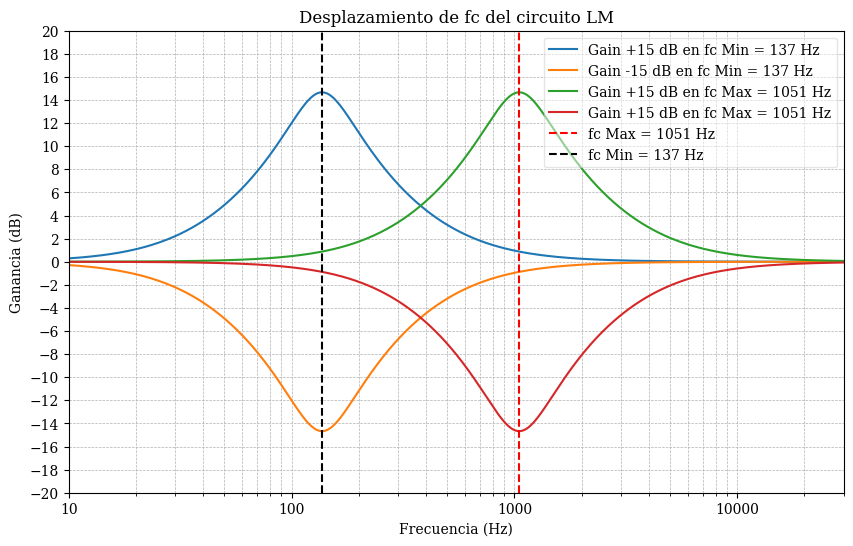

In [9]:
# Graficamos la ganancia en función de la frecuencia
plt.figure(figsize=(10, 6))
plt.semilogx(f, G4, label=f'Gain +15 dB en fc Min = {fc2:.0f} Hz')
plt.semilogx(f, G3, label=f'Gain -15 dB en fc Min = {fc2:.0f} Hz')
plt.semilogx(f, G2, label=f'Gain +15 dB en fc Max = {fc1:.0f} Hz')
plt.semilogx(f, G1, label=f'Gain -15 dB en fc Max = {fc1:.0f} Hz')




plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.xlim([10, 30000])  # Limitar el eje x entre 10 Hz y 20 kHz
plt.ylim([-20, 20])
plt.yticks(np.arange(-20, 21, 2))  # Mostrar ticks en el eje y de 2 en 2 dB
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Personalizar el formato del eje x
ax = plt.gca()
ax.xaxis.set_major_formatter(LogFormatter(base=10, labelOnlyBase=False))  # Muestra números normales en log


# Añadir la línea vertical en fc
plt.axvline(fc1, color='red', linestyle='--', label=f'fc Max = {fc1:.0f} Hz')
plt.axvline(fc2, color='black', linestyle='--', label=f'fc Min = {fc2:.0f} Hz')
plt.legend(loc='upper right', framealpha=0.5)
#plt.legend()
plt.title('Desplazamiento de fc del circuito LM')
plt.show()


In [10]:
# Definimos los parámetros
f = np.linspace(1, 30000, 44100)  # Frecuencia en Hz
w = 2 * np.pi * f                # Frecuencia angular en rad/s
R1 = 15000                       # Resistencia en ohmios
R2 = 15000                       # Resistencia en ohmios
R3 = 115000                       # Resistencia en ohmios
R4 = 115000                       # Resistencia en ohmios
C1 = 15e-9                       # Capacitancia C1 en Faradios
C2 = 6.8e-9                      # Capacitancia C2 en Faradios
Rin = 10000                      # Resistencia de entrada inversora
Rfeed = 10000                    # Resistencia de realimentación inversora
fc1 = 1 / (2 * np.pi * np.sqrt(R1 * R2 * C1 * C2))  # Frecuencia central 1
fc2 = 1 / (2 * np.pi * np.sqrt(R3 * R4 * C1 * C2))  # Frecuencia central 2

# Reactancias y Ganancias en fc1
Xc1_fc1 = 1 / (2 * np.pi * fc1 * C1)
Xc2_fc1 = 1 / (2 * np.pi * fc1 * C2)
Z1_fc1 = R1 + (-1j * Xc1_fc1)
Z2_fc1 = 1 / ((1 / R2) + (1 / (-1j * Xc2_fc1)))
Amin_fc1 = (R1 * Z2_fc1 - R2 * Z1_fc1) / (R1 * (Z1_fc1 + Z2_fc1))
Amax_fc1 = -(R2 * (Z1_fc1 + Z2_fc1)) / (R1 * Z1_fc1 - R2 * Z2_fc1)
Gmin_fc1 = 20 * np.log10(np.abs(Amin_fc1))
Gmax_fc1 = 20 * np.log10(np.abs(Amax_fc1))

# Reactancias y Ganancias en fc2
Xc1_fc2 = 1 / (2 * np.pi * fc2 * C1)
Xc2_fc2 = 1 / (2 * np.pi * fc2 * C2)
Z3_fc2 = R3 + (-1j * Xc1_fc2)
Z4_fc2 = 1 / ((1 / R4) + (1 / (-1j * Xc2_fc2)))
Amin_fc2 = (R3 * Z4_fc2 - R4 * Z3_fc2) / (R3 * (Z3_fc2 + Z4_fc2))
Amax_fc2 = -(R4 * (Z3_fc2 + Z4_fc2)) / (R3 * Z3_fc2 - R4 * Z4_fc2)
Gmin_fc2 = 20 * np.log10(np.abs(Amin_fc2))
Gmax_fc2 = 20 * np.log10(np.abs(Amax_fc2))

# Factor de calidad Q para cada caso usando tu ecuación
Q1 = 0.5 * np.sqrt(((R3 + R2) / (R3 + R1)) * (C1 / C2))
Q2 = 0.5 * np.sqrt(((R4 + R2) / (R4 + R1)) * (C1 / C2))

# Resultados
print(f"fc1 = {fc1:.2f} Hz -> Gmin = {Gmin_fc1:.2f} dB, Gmax = {Gmax_fc1:.2f} dB")
print(f"fc2 = {fc2:.2f} Hz -> Gmin = {Gmin_fc2:.2f} dB, Gmax = {Gmax_fc2:.2f} dB")
print(f"Q para fc1 ({fc1:.2f} Hz): {Q1:.4f}")
print(f"Q para fc2 ({fc2:.2f} Hz): {Q2:.4f}")

fc1 = 1050.58 Hz -> Gmin = -14.67 dB, Gmax = 14.67 dB
fc2 = 137.03 Hz -> Gmin = -14.67 dB, Gmax = 14.67 dB
Q para fc1 (1050.58 Hz): 0.7426
Q para fc2 (137.03 Hz): 0.7426


#HM Peak

In [11]:
# Definimos los parámetros
f = np.linspace(1, 30000, 44100)  # Frecuencia en Hz
w = 2 * np.pi * f                # Frecuencia angular en rad/s
R1 = 2700                       # Resistencia en ohmios
R2 = 2700                       # Resistencia en ohmios
R3 = 22700                       # Resistencia en ohmios
R4 = 22700                       # Resistencia en ohmios
C1 = 15e-9                       # Capacitancia C1 en Faradios
C2 = 6.8e-9                      # Capacitancia C2 en Faradios
Rin = 10000                      # Resistencia de entrada inversora
Rfeed = 10000                    # Resistencia de realimentación inversora
fc1 = 1 / (2 * np.pi * np.sqrt(R1 * R2 * C1 * C2))  # Frecuencia central 1
fc2 = 1 / (2 * np.pi * np.sqrt(R3 * R4 * C1 * C2))  # Frecuencia central 2


# Calculamos las reactancias capacitivas
Xc1 = 1 / (w * C1)
Xc2 = 1 / (w * C2)
Xc3 = 1 / (2 * np.pi * fc1 * C1)
Xc4 = 1 / (2 * np.pi * fc1 * C2)

# Calculamos las impedancias del pasabanda de Wien para fc1
Z1 = R1 + (-1j * Xc1)  # Impedancia Z1 en serie
Z2 = 1 / ((1 / R2) + (1 / (-1j * Xc2)))  # Impedancia Z2 en paralelo
Z1abs = np.abs(R1 + (-1j * Xc3)) # Magnitud de Z1 en serie
Z2abs = np.abs(1 / ((1 / R2) + (1 / (-1j * Xc4))))  # Magnitud de Z2 en paralelo

# Calculamos las impedancias del pasabanda de Wien para fc2
Z3 = R3 + (-1j * Xc1)  # Impedancia Z1 en serie
Z4 = 1 / ((1 / R4) + (1 / (-1j * Xc2)))  # Impedancia Z2 en paralelo
Z1abs = np.abs(R3 + (-1j * Xc3)) # Magnitud de Z1 en serie
Z2abs = np.abs(1 / ((1 / R4) + (1 / (-1j * Xc4))))  # Magnitud de Z2 en paralelo


# Calculamos ganancia del EQ por medio del OP amp restador teniendo en cuenta la posicion del potenciometro
A1 = (R1 * Z2 - R2 * Z1) / (R1 * (Z1 + Z2))
G1 = 20 * np.log10(np.abs(A1))
A2 = -(R2 * (Z1 + Z2)) / (R1 * Z1 - R2 * Z2)
G2 = 20 * np.log10(np.abs(A2))

A3 = (R3 * Z4 - R4 * Z3) / (R3 * (Z3 + Z4))
G3 = 20 * np.log10(np.abs(A3))
A4 = -(R3 * (Z3 + Z4)) / (R3 * Z3 - R4 * Z4)
G4 = 20 * np.log10(np.abs(A4))

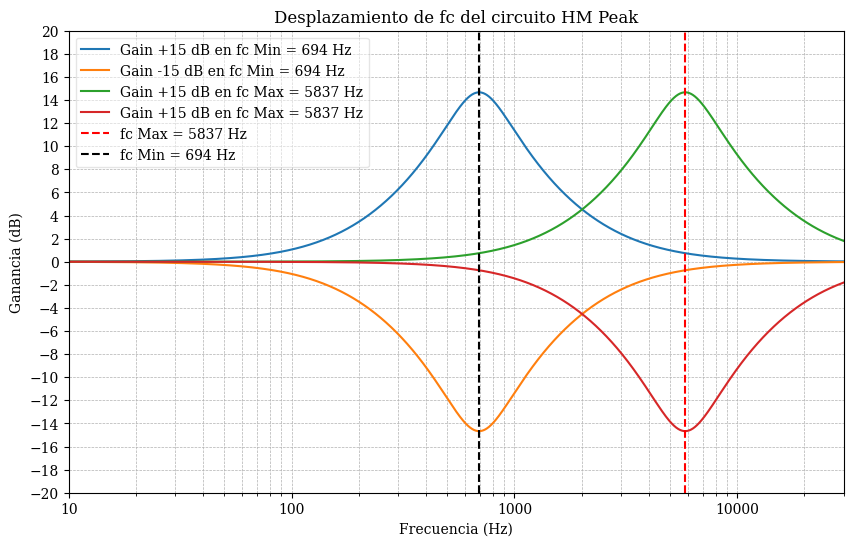

In [12]:
# Graficamos la ganancia en función de la frecuencia
plt.figure(figsize=(10, 6))
plt.semilogx(f, G4, label=f'Gain +15 dB en fc Min = {fc2:.0f} Hz')
plt.semilogx(f, G3, label=f'Gain -15 dB en fc Min = {fc2:.0f} Hz')
plt.semilogx(f, G2, label=f'Gain +15 dB en fc Max = {fc1:.0f} Hz')
plt.semilogx(f, G1, label=f'Gain -15 dB en fc Max = {fc1:.0f} Hz')


plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.xlim([10, 30000])  # Limitar el eje x entre 10 Hz y 20 kHz
plt.ylim([-20, 20])
plt.yticks(np.arange(-20, 21, 2))  # Mostrar ticks en el eje y de 2 en 2 dB
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Personalizar el formato del eje x
ax = plt.gca()
ax.xaxis.set_major_formatter(LogFormatter(base=10, labelOnlyBase=False))  # Muestra números normales en log


# Añadir la línea vertical en fc
plt.axvline(fc1, color='red', linestyle='--', label=f'fc Max = {fc1:.0f} Hz')
plt.axvline(fc2, color='black', linestyle='--', label=f'fc Min = {fc2:.0f} Hz')
plt.legend(loc='upper left', framealpha=0.5)
#plt.legend()
plt.title('Desplazamiento de fc del circuito HM Peak')
plt.show()

In [13]:
# Definimos los parámetros
f = np.linspace(1, 30000, 44100)  # Frecuencia en Hz
w = 2 * np.pi * f                # Frecuencia angular en rad/s
R1 = 2700                       # Resistencia en ohmios
R2 = 2700                       # Resistencia en ohmios
R3 = 22700                       # Resistencia en ohmios
R4 = 22700                       # Resistencia en ohmios
C1 = 15e-9                       # Capacitancia C1 en Faradios
C2 = 6.8e-9                      # Capacitancia C2 en Faradios
Rin = 10000                      # Resistencia de entrada inversora
Rfeed = 10000                    # Resistencia de realimentación inversora
fc1 = 1 / (2 * np.pi * np.sqrt(R1 * R2 * C1 * C2))  # Frecuencia central 1
fc2 = 1 / (2 * np.pi * np.sqrt(R3 * R4 * C1 * C2))  # Frecuencia central 2

# Reactancias y Ganancias en fc1
Xc1_fc1 = 1 / (2 * np.pi * fc1 * C1)
Xc2_fc1 = 1 / (2 * np.pi * fc1 * C2)
Z1_fc1 = R1 + (-1j * Xc1_fc1)
Z2_fc1 = 1 / ((1 / R2) + (1 / (-1j * Xc2_fc1)))
Amin_fc1 = (R1 * Z2_fc1 - R2 * Z1_fc1) / (R1 * (Z1_fc1 + Z2_fc1))
Amax_fc1 = -(R2 * (Z1_fc1 + Z2_fc1)) / (R1 * Z1_fc1 - R2 * Z2_fc1)
Gmin_fc1 = 20 * np.log10(np.abs(Amin_fc1))
Gmax_fc1 = 20 * np.log10(np.abs(Amax_fc1))

# Reactancias y Ganancias en fc2
Xc1_fc2 = 1 / (2 * np.pi * fc2 * C1)
Xc2_fc2 = 1 / (2 * np.pi * fc2 * C2)
Z3_fc2 = R3 + (-1j * Xc1_fc2)
Z4_fc2 = 1 / ((1 / R4) + (1 / (-1j * Xc2_fc2)))
Amin_fc2 = (R3 * Z4_fc2 - R4 * Z3_fc2) / (R3 * (Z3_fc2 + Z4_fc2))
Amax_fc2 = -(R4 * (Z3_fc2 + Z4_fc2)) / (R3 * Z3_fc2 - R4 * Z4_fc2)
Gmin_fc2 = 20 * np.log10(np.abs(Amin_fc2))
Gmax_fc2 = 20 * np.log10(np.abs(Amax_fc2))

# Factor de calidad Q para cada caso usando tu ecuación
Q1 = 0.5 * np.sqrt(((R3 + R2) / (R3 + R1)) * (C1 / C2))
Q2 = 0.5 * np.sqrt(((R4 + R2) / (R4 + R1)) * (C1 / C2))

# Resultados
print(f"fc1 = {fc1:.2f} Hz -> Gmin = {Gmin_fc1:.2f} dB, Gmax = {Gmax_fc1:.2f} dB")
print(f"fc2 = {fc2:.2f} Hz -> Gmin = {Gmin_fc2:.2f} dB, Gmax = {Gmax_fc2:.2f} dB")
print(f"Q para fc1 ({fc1:.2f} Hz): {Q1:.4f}")
print(f"Q para fc2 ({fc2:.2f} Hz): {Q2:.4f}")

fc1 = 5836.55 Hz -> Gmin = -14.67 dB, Gmax = 14.67 dB
fc2 = 694.22 Hz -> Gmin = -14.67 dB, Gmax = 14.67 dB
Q para fc1 (5836.55 Hz): 0.7426
Q para fc2 (694.22 Hz): 0.7426


##HF EQ

##HF Peak

In [24]:
# Definimos los parámetros
f = np.linspace(1, 30000, 44100)  # Frecuencia en Hz
w = 2 * np.pi * f                # Frecuencia angular en rad/s
R1 = 2700                      # Resistencia en ohmios
R2 = 2700                       # Resistencia en ohmios
R3 = 22700                       # Resistencia en ohmios
R4 = 22700                       # Resistencia en ohmios
C1 = 4.7e-9                       # Capacitancia C1 en Faradios
C2 = 2.2e-9                      # Capacitancia C2 en Faradios
Rin = 10000                      # Resistencia de entrada inversora
Rfeed = 10000                    # Resistencia de realimentación inversora
fc1 = 1 / (2 * np.pi * np.sqrt(R1 * R2 * C1 * C2))  # Frecuencia central 1
fc2 = 1 / (2 * np.pi * np.sqrt(R3 * R4 * C1 * C2))  # Frecuencia central 2


# Calculamos las reactancias capacitivas
Xc1 = 1 / (w * C1)
Xc2 = 1 / (w * C2)
Xc3 = 1 / (2 * np.pi * fc1 * C1)
Xc4 = 1 / (2 * np.pi * fc1 * C2)

# Calculamos las impedancias del pasabanda de Wien para fc1
Z1 = R1 + (-1j * Xc1)  # Impedancia Z1 en serie
Z2 = 1 / ((1 / R2) + (1 / (-1j * Xc2)))  # Impedancia Z2 en paralelo
Z1abs = np.abs(R1 + (-1j * Xc3)) # Magnitud de Z1 en serie
Z2abs = np.abs(1 / ((1 / R2) + (1 / (-1j * Xc4))))  # Magnitud de Z2 en paralelo

# Calculamos las impedancias del pasabanda de Wien para fc2
Z3 = R3 + (-1j * Xc1)  # Impedancia Z1 en serie
Z4 = 1 / ((1 / R4) + (1 / (-1j * Xc2)))  # Impedancia Z2 en paralelo
Z1abs = np.abs(R3 + (-1j * Xc3)) # Magnitud de Z1 en serie
Z2abs = np.abs(1 / ((1 / R4) + (1 / (-1j * Xc4))))  # Magnitud de Z2 en paralelo


# Calculamos ganancia del EQ por medio del OP amp restador teniendo en cuenta la posicion del potenciometro
A1 = (R1 * Z2 - R2 * Z1) / (R1 * (Z1 + Z2))
G1 = 20 * np.log10(np.abs(A1))
A2 = -(R2 * (Z1 + Z2)) / (R1 * Z1 - R2 * Z2)
G2 = 20 * np.log10(np.abs(A2))

A3 = (R3 * Z4 - R4 * Z3) / (R3 * (Z3 + Z4))
G3 = 20 * np.log10(np.abs(A3))
A4 = -(R3 * (Z3 + Z4)) / (R3 * Z3 - R4 * Z4)
G4 = 20 * np.log10(np.abs(A4))

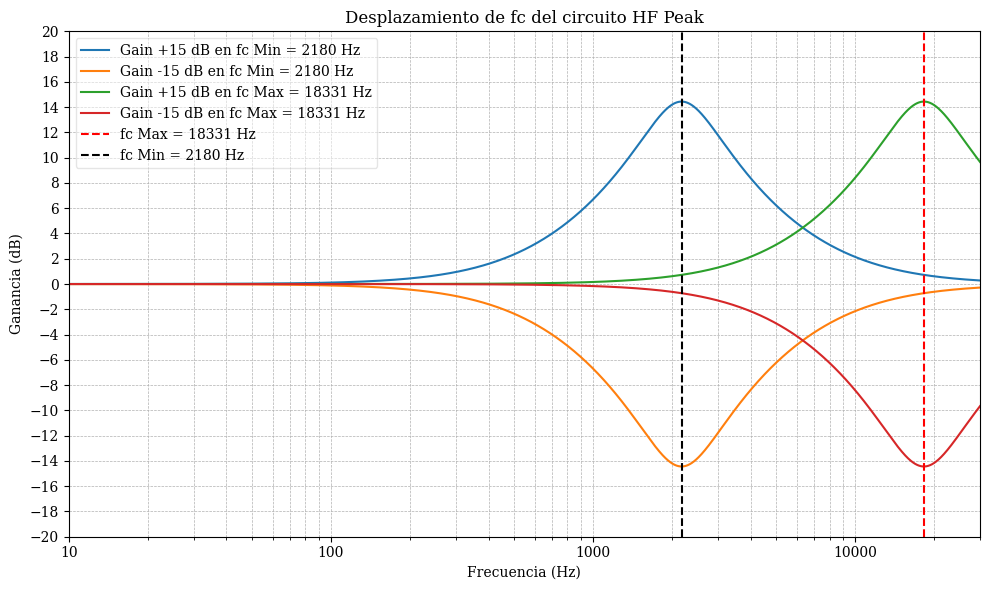

In [25]:
# Graficamos la ganancia en función de la frecuencia
plt.figure(figsize=(10, 6))
plt.semilogx(f, G4, label=f'Gain +15 dB en fc Min = {fc2:.0f} Hz')
plt.semilogx(f, G3, label=f'Gain -15 dB en fc Min = {fc2:.0f} Hz')
plt.semilogx(f, G2, label=f'Gain +15 dB en fc Max = {fc1:.0f} Hz')
plt.semilogx(f, G1, label=f'Gain -15 dB en fc Max = {fc1:.0f} Hz')


plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.xlim([10, 30000])  # Limitar el eje x entre 10 Hz y 20 kHz
plt.ylim([-20, 20])
plt.yticks(np.arange(-20, 21, 2))  # Mostrar ticks en el eje y de 2 en 2 dB
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Personalizar el formato del eje x
ax = plt.gca()
ax.xaxis.set_major_formatter(LogFormatter(base=10, labelOnlyBase=False))  # Muestra números normales en log


# Añadir la línea vertical en fc
plt.axvline(fc1, color='red', linestyle='--', label=f'fc Max = {fc1:.0f} Hz')
plt.axvline(fc2, color='black', linestyle='--', label=f'fc Min = {fc2:.0f} Hz')
plt.legend(loc='upper left', framealpha=0.5)
#plt.legend()
plt.title('Desplazamiento de fc del circuito HF Peak')
# Ajuste automático para evitar solapamiento de elementos
plt.tight_layout()
plt.show()

In [16]:
# Definimos los parámetros
f = np.linspace(1, 30000, 44100)  # Frecuencia en Hz
w = 2 * np.pi * f                # Frecuencia angular en rad/s
R1 = 2700                      # Resistencia en ohmios
R2 = 2700                       # Resistencia en ohmios
R3 = 22700                       # Resistencia en ohmios
R4 = 22700                       # Resistencia en ohmios
C1 = 4.7e-9                       # Capacitancia C1 en Faradios
C2 = 2.2e-9                      # Capacitancia C2 en Faradios
Rin = 10000                      # Resistencia de entrada inversora
Rfeed = 10000                    # Resistencia de realimentación inversora
fc1 = 1 / (2 * np.pi * np.sqrt(R1 * R2 * C1 * C2))  # Frecuencia central 1
fc2 = 1 / (2 * np.pi * np.sqrt(R3 * R4 * C1 * C2))  # Frecuencia central 2

# Reactancias y Ganancias en fc1
Xc1_fc1 = 1 / (2 * np.pi * fc1 * C1)
Xc2_fc1 = 1 / (2 * np.pi * fc1 * C2)
Z1_fc1 = R1 + (-1j * Xc1_fc1)
Z2_fc1 = 1 / ((1 / R2) + (1 / (-1j * Xc2_fc1)))
Amin_fc1 = (R1 * Z2_fc1 - R2 * Z1_fc1) / (R1 * (Z1_fc1 + Z2_fc1))
Amax_fc1 = -(R2 * (Z1_fc1 + Z2_fc1)) / (R1 * Z1_fc1 - R2 * Z2_fc1)
Gmin_fc1 = 20 * np.log10(np.abs(Amin_fc1))
Gmax_fc1 = 20 * np.log10(np.abs(Amax_fc1))

# Reactancias y Ganancias en fc2
Xc1_fc2 = 1 / (2 * np.pi * fc2 * C1)
Xc2_fc2 = 1 / (2 * np.pi * fc2 * C2)
Z3_fc2 = R3 + (-1j * Xc1_fc2)
Z4_fc2 = 1 / ((1 / R4) + (1 / (-1j * Xc2_fc2)))
Amin_fc2 = (R3 * Z4_fc2 - R4 * Z3_fc2) / (R3 * (Z3_fc2 + Z4_fc2))
Amax_fc2 = -(R4 * (Z3_fc2 + Z4_fc2)) / (R3 * Z3_fc2 - R4 * Z4_fc2)
Gmin_fc2 = 20 * np.log10(np.abs(Amin_fc2))
Gmax_fc2 = 20 * np.log10(np.abs(Amax_fc2))

# Factor de calidad Q para cada caso usando tu ecuación
Q1 = 0.5 * np.sqrt(((R3 + R2) / (R3 + R1)) * (C1 / C2))
Q2 = 0.5 * np.sqrt(((R4 + R2) / (R4 + R1)) * (C1 / C2))

# Resultados
print(f"fc1 = {fc1:.2f} Hz -> Gmin = {Gmin_fc1:.2f} dB, Gmax = {Gmax_fc1:.2f} dB")
print(f"fc2 = {fc2:.2f} Hz -> Gmin = {Gmin_fc2:.2f} dB, Gmax = {Gmax_fc2:.2f} dB")
print(f"Q para fc1 ({fc1:.2f} Hz): {Q1:.4f}")
print(f"Q para fc2 ({fc2:.2f} Hz): {Q2:.4f}")

fc1 = 18331.42 Hz -> Gmin = -14.44 dB, Gmax = 14.44 dB
fc2 = 2180.39 Hz -> Gmin = -14.44 dB, Gmax = 14.44 dB
Q para fc1 (18331.42 Hz): 0.7308
Q para fc2 (2180.39 Hz): 0.7308


##HF Shelving

In [32]:
# Definimos los parámetros
f = np.linspace(1, 30000, 44100)  # Frecuencia en Hz
w = 2 * np.pi * f                # Frecuencia angular en rad/s
Rdiv1 = 6800                       # Resistencia en ohmios
Rdiv2 = 4700                       # Resistencia en ohmios
R1 = 2700                       # Resistencia en ohmios
R2 = 22700                       # Resistencia en ohmios
C = 22e-9                       # Capacitancia C1 en Faradios
Rin = 10000                      # Resistencia de entrada inversora
Rfeed = 10000                    # Resistencia de realimentación inversora
fc1 = 1 / (2 * np.pi * R1 * C)  # Frecuencia central 1
fc2 = 1 / (2 * np.pi * R2 * C)  # Frecuencia central 2

# Calculamos la reactancia capacitiva
Xc1 = 1 / (w * C)

# Calculamos la impedancia capacitiva
Z1 = -1j * Xc1

# Calculamos el divisor de voltaje
Adiv = Rdiv2 / (Rdiv1 + Rdiv2)

# Calculamos la ecuacion de ganancia del LPF
Alp = Z1 / (Z1 + R1)

#Ganancia del LPF con atenuador
At = Adiv * Alp
G = 20 * np.log10(np.abs(At))

# Calculamos ganancia del EQ por medio del OP amp restador teniendo en cuenta la posicion del potenciometro
Av1 = -(Rfeed*(Rdiv1 + Rdiv2)*(R1 + Z1))/(R1*Rdiv1*Rin - R1*Rdiv2*Rfeed + Rdiv1*Rin*Z1 + Rdiv2*Rin*Z1)
G1 = 20 * np.log10(np.abs(Av1))
Av2 = -(Rfeed*(Rdiv1 + Rdiv2)*(R2 + Z1))/(R2*Rdiv1*Rin - R2*Rdiv2*Rfeed + Rdiv1*Rin*Z1 + Rdiv2*Rin*Z1)
G2 = 20 * np.log10(np.abs(Av2))
Av3 = -(R1*Rdiv1*Rfeed - R1*Rdiv2*Rin + Rdiv1*Rfeed*Z1 + Rdiv2*Rfeed*Z1)/(Rin*(Rdiv1 + Rdiv2)*(R1 + Z1))
G3 = 20 * np.log10(np.abs(Av3))
Av4 = -(R2*Rdiv1*Rfeed - R2*Rdiv2*Rin + Rdiv1*Rfeed*Z1 + Rdiv2*Rfeed*Z1)/(Rin*(Rdiv1 + Rdiv2)*(R2 + Z1))
G4 = 20 * np.log10(np.abs(Av4))

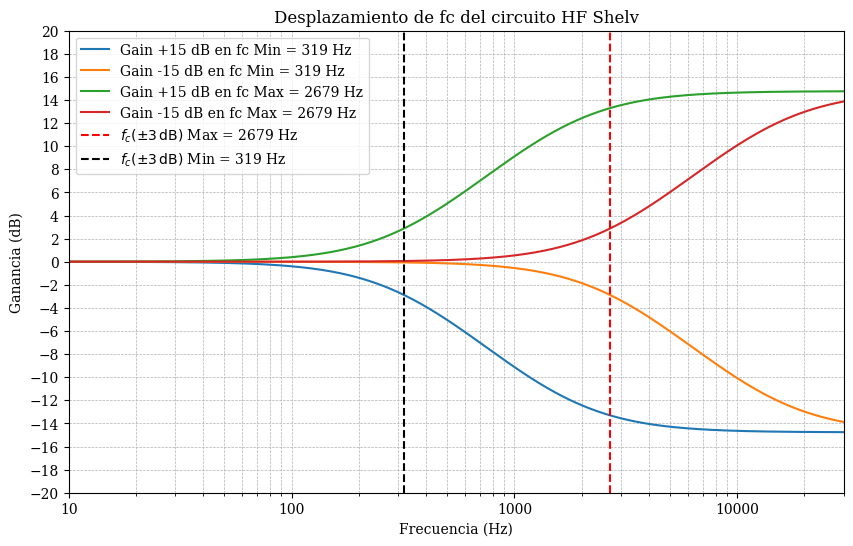

In [33]:
plt.figure(figsize=(10, 6))
plt.semilogx(f, G4, label=f'Gain +15 dB en fc Min = {fc2:.0f} Hz');
plt.semilogx(f, G3, label=f'Gain -15 dB en fc Min = {fc2:.0f} Hz');
plt.semilogx(f, G2, label=f'Gain +15 dB en fc Max = {fc1:.0f} Hz');
plt.semilogx(f, G1, label=f'Gain -15 dB en fc Max = {fc1:.0f} Hz');

plt.xlabel('Frecuencia (Hz)');
plt.ylabel('Ganancia (dB)');
plt.xlim([10, 30000]);  # Limitar el eje x entre 10 Hz y 20 kHz
plt.ylim([-20, 20]);
plt.yticks(np.arange(-20, 21, 2));  # Mostrar ticks en el eje y de 2 en 2 dB
plt.grid(True, which='both', linestyle='--', linewidth=0.5);

# Personalizar el formato del eje x
ax = plt.gca();
ax.xaxis.set_major_formatter(LogFormatter(base=10, labelOnlyBase=False)) ; # Muestra números normales en log


# Añadir la línea vertical en fc
plt.axvline(fc1, color='red', linestyle='--',
            label=fr'$f_c (\pm 3 \, \mathrm{{dB}})$ Max = {fc1:.0f} Hz')

plt.axvline(fc2, color='black', linestyle='--',
            label=fr'$f_c (\pm 3 \, \mathrm{{dB}})$ Min = {fc2:.0f} Hz')

plt.legend();
plt.title('Desplazamiento de fc del circuito HF Shelv');
plt.show();

In [19]:
import numpy as np

f = np.linspace(1, 30000, 44100)  # Frecuencia en Hz
w = 2 * np.pi * f                # Frecuencia angular en rad/s
Rdiv1 = 6800                       # Resistencia en ohmios
Rdiv2 = 4700                       # Resistencia en ohmios
R1 = 2700                       # Resistencia en ohmios
R2 = 22700                       # Resistencia en ohmios
C = 22e-9                       # Capacitancia C1 en Faradios
Rin = 10000                      # Resistencia de entrada inversora
Rfeed = 10000                    # Resistencia de realimentación inversora
fc1 = 1 / (2 * np.pi * R1 * C)  # Frecuencia central 1
fc2 = 1 / (2 * np.pi * R2 * C)  # Frecuencia central 2

# Frecuencias centrales
fc1 = 1 / (2 * np.pi * R1 * C)
fc2 = 1 / (2 * np.pi * R2 * C)

# Reactancia capacitiva
Xc1 = 1 / (w * C)
Z1 = -1j * Xc1

# Divisor de voltaje
Adiv = Rdiv2 / (Rdiv1 + Rdiv2)

# Filtro LPF con atenuador
Alp = Z1 / (Z1 + R1)
At = Adiv * Alp
G = 20 * np.log10(np.abs(At))

# Vectorizados: Ganancias con el operacional restador
Av1 = -(Rfeed * (Rdiv1 + Rdiv2) * (R1 + Z1)) / (R1 * Rdiv1 * Rin + R1 * Rdiv2 * Rin - Rdiv2 * Rfeed * Z1 + Rdiv1 * Rin * Z1)
G1 = 20 * np.log10(np.abs(Av1))

Av2 = -(Rfeed * (Rdiv1 + Rdiv2) * (R2 + Z1)) / (R2 * Rdiv1 * Rin + R2 * Rdiv2 * Rin - Rdiv2 * Rfeed * Z1 + Rdiv1 * Rin * Z1)
G2 = 20 * np.log10(np.abs(Av2))

Av3 = -(R1 * Rdiv1 * Rfeed + R1 * Rdiv2 * Rfeed + Rdiv1 * Rfeed * Z1 - Rdiv2 * Rin * Z1) / (Rin * (Rdiv1 + Rdiv2) * (R1 + Z1))
G3 = 20 * np.log10(np.abs(Av3))

Av4 = -(R2 * Rdiv1 * Rfeed + R2 * Rdiv2 * Rfeed + Rdiv1 * Rfeed * Z1 - Rdiv2 * Rin * Z1) / (Rin * (Rdiv1 + Rdiv2) * (R2 + Z1))
G4 = 20 * np.log10(np.abs(Av4))

Gmax = np.abs(20*np.log10(1-(2*(Rdiv2/(Rdiv2+Rdiv1)))))


# Índices de frecuencia más cercanos a fc1 y fc2
idx_fc1 = np.argmin(np.abs(f - fc1))
idx_fc2 = np.argmin(np.abs(f - fc2))

# Resultados
results = {
    "fc1": fc1,
    "Gmin_fc1": G3[idx_fc1],
    "Gmax_fc1": G1[idx_fc1],
    "fc2": fc2,
    "Gmin_fc2": G4[idx_fc2],
    "Gmax_fc2": G2[idx_fc2],

}

print(f"fc1 = {results['fc1']:.2f} Hz -> Gfcmin = {results['Gmin_fc1']:.2f} dB, Gfcmax = {results['Gmax_fc1']:.2f} dB")
print(f"fc2 = {results['fc2']:.2f} Hz -> Gfcmin = {results['Gmin_fc2']:.2f} dB, Gfcmax = {results['Gmax_fc2']:.2f} dB")
print('|Gain(dB)| = ',round(Gmax,2))

fc1 = 2679.38 Hz -> Gfcmin = -2.87 dB, Gfcmax = 2.87 dB
fc2 = 318.69 Hz -> Gfcmin = -2.87 dB, Gfcmax = 2.87 dB
|Gain(dB)| =  14.77
